# Prepare the data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "C:\\Users\\Goon\\Downloads\\Starter_Code (10)\\Starter_Code\\Pymaceuticals\\data\\Mouse_metadata.csv"
study_results_path = "C:\\Users\\Goon\\Downloads\\Starter_Code (10)\\Starter_Code\\Pymaceuticals\\data\\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
all_data = pd.merge(mouse_metadata, study_results, how="right", on=['Mouse ID'])


# Display the data table for preview
all_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
num_mice = len(all_data["Mouse ID"].unique())
num_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
all_data.loc[all_data.duplicated(subset = ['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = all_data.loc[all_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
dup_mouse = all_data.loc[all_data["Mouse ID"] == "g989", :]
dup_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = all_data[all_data["Mouse ID"].isin(duplicate_mice)==False]
clean_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
#check num of mice 
len(clean_data['Mouse ID'].unique())


248

# Summary stats

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


mean = all_data.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
median = all_data.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
variance = all_data.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
std = all_data.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
sem = all_data.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]

summary =pd.DataFrame({'Mean Tumor Volume':mean,
                          'Median Tumor Volume':median,
                          'Variance Tumor Volume':variance,
                          'Tumor Volume Std. Dev.':std,
                          'Tumor Volume Std. Err.': sem})

summary


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line.

clean_data.groupby(['Drug Regimen'])[["Tumor Volume (mm3)"]].aggregate(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Charts

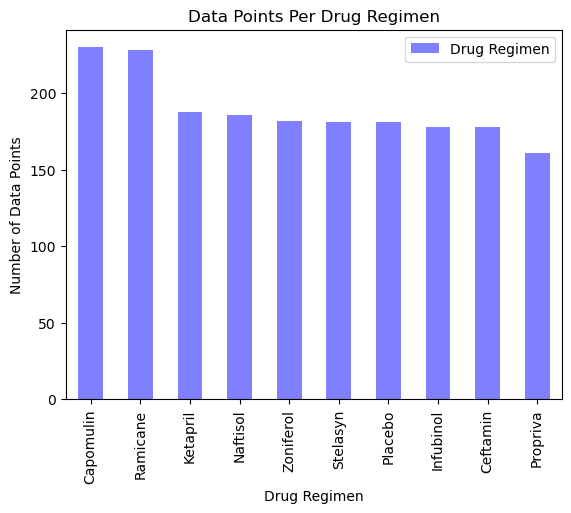

In [9]:
drugs = pd.DataFrame(pd.value_counts(all_data["Drug Regimen"]))
drugs
ax = drugs.plot(kind="bar", color="blue", alpha=0.5, align="center")

# Set the axis labels and title
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Data Points")
ax.set_title("Data Points Per Drug Regimen")

# Display the plot
plt.show()


In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#drug_counts = all_data.groupby(['Drug Regimen']).count()['Mouse ID']

# Create a bar plot
#plt.bar(drug_counts.index, drug_counts.values)

# Add labels and titles
#plt.ylabel('Number of Timepoints')
#plt.title('Total Number of Timepoints for each Drug Regimen')
#plt.show()

In [11]:
# Show the plot

# Calculate the amount of data points for each drug regimen
timepoint_tot = all_data['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(timepoint_tot))

# Generate a bar plot with the length of the 'counts' series
# as the amount of values on the x axis, and the corresponding values
# in the series as the y values
plt.bar(x_axis, timepoint_tot, width=0.5, align="center")

# Label the tick marks according to the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoint_tot.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')

# Show the plot
plt.show()

NameError: name 'np' is not defined

In [ ]:
# Count the number of female and male mice
gender_counts = all_data['Sex'].value_counts()

# Create a pie plot
pie_chart = gender_counts.plot.pie(autopct="%1.1f%%", startangle=0, title='Distribution by Sex')

# Add title
plt.title('Distribution of Female vs Male Mice')

# Show the plot
plt.show()

In [ ]:

# Count the number of female and male mice
gender_counts = all_data['Sex'].value_counts()

# Create a pie plot
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=0)

# Add title
plt.title('Distribution of Female vs Male Mice')

# Show the plot
plt.show()


# Quartiles Outliers and boxplots

In [ ]:
# Create a list of the four drug regimens
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Get the last timepoint for each mouse
last_timepoints = all_data.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()

# Create a DataFrame with the last timepoints and the corresponding drug regimens
last_timepoints_df = pd.DataFrame({'Timepoint': last_timepoints, 'Drug Regimen': all_data['Drug Regimen']})

# Filter the DataFrame to include only the four drug regimens of interest
last_timepoints_df = last_timepoints_df[last_timepoints_df['Drug Regimen'].isin(drugs)]

# Merge the filtered DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol = pd.merge(all_data, last_timepoints_df, on=['Mouse ID', 'Timepoint'], how='right')[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

# Print the final tumor volume for each mouse across the four drug regimens
print(final_tumor_vol)


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = all_data.loc[all_data['Drug Regimen'] == treatment].groupby('Mouse ID')['Timepoint', 'Tumor Volume (mm3)'].max()

    # add subset 
    tumor_volumes.append(final_tumor_vol['Tumor Volume (mm3)'])

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = final_tumor_vol.loc[(final_tumor_vol['Tumor Volume (mm3)'] < lower_bound) | (final_tumor_vol['Tumor Volume (mm3)'] > upper_bound)]
    
    print(f"For {treatment}, potential outliers are: {outliers['Tumor Volume (mm3)'].values}")


In [ ]:
# Create a list of the four treatment regimens
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to store the tumor volume data for each treatment
tumor_volumes = []

# Loop through each treatment regimen and get the final tumor volumes for each mouse
for treatment in treatments:
    final_volumes = all_data.loc[all_data["Drug Regimen"] == treatment].groupby("Mouse ID").agg({"Timepoint": "max", "Tumor Volume (mm3)": "last"})["Tumor Volume (mm3)"]
    tumor_volumes.append(final_volumes)

# Create a figure and axis object
fig, ax = plt.subplots()

# Generate the box plot
ax.boxplot(tumor_volumes, labels=treatments)

# Set title and axis labels
ax.set_title("Distribution of Tumor Volume by Treatment")
ax.set_xlabel("Treatment Regimen")
ax.set_ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()


# Lines and scatter 

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Select data with only Capomulin
capomulin_data = all_data.loc[all_data["Drug Regimen"] == "Capomulin",:]

# Locate specific mouse within Capomulin Data
plt_data = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509",:]
plt_data.head()

x_axis = plot_data["Timepoint"]
tumor_size = plot_data["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_size,linewidth=2,color="royalblue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')


In [ ]:
# Filter the data to include only the data for the Capomulin treatment regimen
capomulin_data = all_data.loc[all_data["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse on the Capomulin regimen
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the weight for each mouse on the Capomulin regimen
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create a figure and axis object
fig, ax = plt.subplots()

# Generate the scatter plot
ax.scatter(mouse_weight, average_tumor_volume)

# Set title and axis labels
ax.set_title("Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen")
ax.set_xlabel("Weight (g)")
ax.set_ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()


# Correlation and regression 

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Subset the data for only Capomulin regimen
capomulin_data = all_data.loc[all_data['Drug Regimen'] == 'Capomulin', :]

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(avg_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Calculate the correlation coefficient
corr_coef, p_value = pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Create a linear regression model
model = LinearRegression()
model.fit(merged_data[['Weight (g)']], merged_data['Tumor Volume (mm3)'])
intercept = model.intercept_
slope = model.coef_[0]

# Plot the scatter plot with the linear regression line
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.plot(merged_data['Weight (g)'], intercept + slope * merged_data['Weight (g)'], color='red')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Print the correlation coefficient and linear regression equation
print('Correlation coefficient:', corr_coef)
print('Linear regression equation: y = {:.2f}x + {:.2f}'.format(slope, intercept))
